#Section 1: Environment setup and data loading

In [ ]:
!python --version

Python 3.7.12


In [ ]:
!pwd

/content


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

--2022-02-22 22:36:33--  https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300971569 (287M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop3.2.tgz.2’

spark-3.2.1-bin-had 100%[===================>] 287.03M   319MB/s    in 0.9s    

2022-02-22 22:36:34 (319 MB/s) - ‘spark-3.2.1-bin-hadoop3.2.tgz.2’ saved [300971569/300971569]



In [ ]:
!tar -xvzf spark-3.2.1-bin-hadoop3.2.tgz

spark-3.2.1-bin-hadoop3.2/
spark-3.2.1-bin-hadoop3.2/LICENSE
spark-3.2.1-bin-hadoop3.2/NOTICE
spark-3.2.1-bin-hadoop3.2/R/
spark-3.2.1-bin-hadoop3.2/R/lib/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/DESCRIPTION
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/INDEX
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/Rd.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/features.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/hsearch.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/links.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/nsInfo.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/package.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/vignette.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/NAMESPACE
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdb
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdx
spark-3.2.1-bin-hadoop3.2/R/lib/Sp

In [ ]:
!ls /content/spark-3.2.1-bin-hadoop3.2

bin   data	jars	    LICENSE   NOTICE  R		 RELEASE  yarn
conf  examples	kubernetes  licenses  python  README.md  sbin


In [ ]:
!pip install findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdkamd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"
import findspark
findspark.init()

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.13" 2021-10-19
OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PySpark 3.2.1 Setup on Google Colab").getOrCreate()


In [ ]:
ipl_ball_by_ball= spark.read.load("ipl_ball_by_ball.csv",format="csv", sep=",", inferSchema="true", header="true")
ipl_ball_by_ball.printSchema()
ipl_ball_by_ball.show()
ipl_ball_by_ball.count()

root
 |-- match_id: integer (nullable = true)
 |-- inning: integer (nullable = true)
 |-- overs: integer (nullable = true)
 |-- ball: integer (nullable = true)
 |-- batsman: string (nullable = true)
 |-- non_striker: string (nullable = true)
 |-- bowler: string (nullable = true)
 |-- batsman_runs: integer (nullable = true)
 |-- extra_runs: integer (nullable = true)
 |-- total_runs: integer (nullable = true)
 |-- non_boundary: integer (nullable = true)
 |-- is_wicket: integer (nullable = true)
 |-- dismissal_kind: string (nullable = true)
 |-- player_dismissed: string (nullable = true)
 |-- fielder: string (nullable = true)
 |-- extras_type: string (nullable = true)
 |-- batting_team: string (nullable = true)
 |-- bowling_team: string (nullable = true)

+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------------+
|match_id|innin

193468

In [ ]:
ipl_matches= spark.read.load("ipl_matches.csv",format="csv", sep=",", inferSchema="true", header="true")
ipl_matches.printSchema()
ipl_matches.show()

root
 |-- match_id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- player_of_match: string (nullable = true)
 |-- venue_id: integer (nullable = true)
 |-- neutral_venue: integer (nullable = true)
 |-- team1: string (nullable = true)
 |-- team2: string (nullable = true)
 |-- toss_winner: string (nullable = true)
 |-- toss_decision: string (nullable = true)
 |-- winner: string (nullable = true)
 |-- result: string (nullable = true)
 |-- result_margin: string (nullable = true)
 |-- eliminator: string (nullable = true)
 |-- method: string (nullable = true)
 |-- umpire1: string (nullable = true)
 |-- umpire2: string (nullable = true)

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_

In [ ]:
ipl_venue= spark.read.load("ipl_venue.csv",format="csv", sep=",", inferSchema="true", header="true")
ipl_venue.printSchema()
ipl_venue.show()

root
 |-- venue_id: integer (nullable = true)
 |-- venue: string (nullable = true)
 |-- city: string (nullable = true)

+--------+--------------------+--------------+
|venue_id|               venue|          city|
+--------+--------------------+--------------+
|       1|Dr. Y.S. Rajasekh...| Visakhapatnam|
|       2|Sharjah Cricket S...|       Sharjah|
|       3|JSCA Internationa...|        Ranchi|
|       4|Saurashtra Cricke...|        Rajkot|
|       5|Shaheed Veer Nara...|        Raipur|
|       6|Maharashtra Crick...|          Pune|
|       7|Subrata Roy Sahar...|          Pune|
|       8|    St George's Park|Port Elizabeth|
|       9|Vidarbha Cricket ...|        Nagpur|
|      12|   Brabourne Stadium|        Mumbai|
|      13|Dr DY Patil Sport...|        Mumbai|
|      14|    Wankhede Stadium|        Mumbai|
|      15|        Eden Gardens|       Kolkata|
|      16|       Nehru Stadium|         Kochi|
|      17|De Beers Diamond ...|     Kimberley|
|      18|          Green Park|   

In [ ]:
ReadMe= spark.read.text("ReadMe.txt")
ReadMe.show()

+--------------------+
|               value|
+--------------------+
|If you are faced ...|
|                    |
|The downstream er...|
|One of the possib...|
|After that you ca...|
|to combine it int...|
+--------------------+



In [ ]:
spark.catalog

In [ ]:
spark.catalog.listDatabases()

[Database(name='default', description='default database', locationUri='file:/content/spark-warehouse')]

In [ ]:
spark.sql('show databases').show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [ ]:
ipl_ball_by_ball.createOrReplaceTempView("ipl_ball_by_ball")
ipl_matches.createOrReplaceTempView("ipl_matches")
ipl_venue.createOrReplaceTempView("ipl_venue")

In [ ]:
spark.catalog.listTables()

[Table(name='ipl_ball_by_ball', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='ipl_matches', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='ipl_venue', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

In [ ]:
spark

#Section 2: Analyze the given dataset and answer the question using Spark(pySpark).

In [ ]:
eliminator=ipl_matches.filter(ipl_matches.eliminator == "Y").groupBy('venue_id').count().sort('count',ascending=False).limit(3)
top3=ipl_venue.join(eliminator,ipl_venue.venue_id== eliminator.venue_id,"inner")\
.sort('count',ascending=False).select("venue","city","count")
top3.show()

+--------------------+---------+-----+
|               venue|     city|count|
+--------------------+---------+-----+
|Dubai Internation...|    Dubai|    3|
|Sheikh Zayed Stadium|Abu Dhabi|    2|
|    Feroz Shah Kotla|    Delhi|    1|
+--------------------+---------+-----+



In [ ]:
caught=ipl_ball_by_ball.filter(ipl_ball_by_ball.dismissal_kind=='caught').groupBy('fielder').count()\
.sort('count',ascending=False).limit(1)
caught.show()

+----------+-----+
|   fielder|count|
+----------+-----+
|KD Karthik|  118|
+----------+-----+



In [ ]:
method=ipl_matches.filter(ipl_matches.method=='D/L')
method.show()
method.count()

+--------+----------+----------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+--------------------+---------------+
|match_id|      date| player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|             umpire1|        umpire2|
+--------+----------+----------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+--------------------+---------------+
|  336022|2008-05-17|DPMD Jayawardene|      27|            0|    Delhi Daredevils|     Kings XI Punjab|    Delhi Daredevils|          bat|     Kings XI Punjab|   runs|            6|         N|   D/L|      AV Jayaprakash|    RE Koertzen|
|  336025|2008-05-18|         M Ntini|      15|     

19

In [ ]:
distinct_column_vals = ipl_ball_by_ball.select('dismissal_kind').distinct().collect()
distinct_column_vals

[Row(dismissal_kind='stumped'),
 Row(dismissal_kind='hit wicket'),
 Row(dismissal_kind='NA'),
 Row(dismissal_kind='bowled'),
 Row(dismissal_kind='lbw'),
 Row(dismissal_kind='obstructing the field'),
 Row(dismissal_kind='caught and bowled'),
 Row(dismissal_kind='retired hurt'),
 Row(dismissal_kind='caught'),
 Row(dismissal_kind='run out')]

In [ ]:
highest_wicket_taker=ipl_ball_by_ball.join(method,ipl_ball_by_ball.match_id== method.match_id,"inner")\
.filter((ipl_ball_by_ball.dismissal_kind!="NA")&(ipl_ball_by_ball.dismissal_kind!="retired hurt"))\
.groupBy("bowler").count().sort('count',ascending=False).limit(1)
highest_wicket_taker.show()

+--------+-----+
|  bowler|count|
+--------+-----+
|R Ashwin|    8|
+--------+-----+



In [ ]:
e=ipl_ball_by_ball.filter(ipl_ball_by_ball["overs"]>=7)\
.filter((ipl_ball_by_ball.extras_type!='noballs') & (ipl_ball_by_ball.extras_type!='wides'))
e.show()
e.count()


+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+---------------+
|match_id|inning|overs|ball|      batsman|  non_striker|      bowler|batsman_runs|extra_runs|total_runs|non_boundary|is_wicket|dismissal_kind|player_dismissed|fielder|extras_type|        batting_team|   bowling_team|
+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+---------------+
|  419157|     2|   16|   4|      V Kohli|R Vinay Kumar|CRD Fernando|           0|         0|         0|           0|        0|            NA|              NA|     NA|         NA|Royal Challengers...| Mumbai Indians|
|  419157|     2|   16|   5|      V Kohli|R Vinay Kumar|CRD Fernando|           1|         0|         1|           0|        0|     

118532

In [ ]:
ball_face=e.groupBy("batsman").count()
ball_face=ball_face.withColumnRenamed("count","No_of_ball_faced")
ball_face.show()

+---------------+----------------+
|        batsman|No_of_ball_faced|
+---------------+----------------+
|  Kuldeep Yadav|              75|
|     TM Dilshan|             498|
|     S Anirudha|              81|
|     KA Pollard|            1929|
|        J Botha|             287|
| M Muralitharan|              29|
|  LA Carseldine|              27|
|    SS Cottrell|               2|
|      CA Ingram|             152|
|       DR Smith|             663|
|       M Manhas|             398|
|     A Flintoff|              39|
|      GR Napier|              16|
|       AR Patel|             675|
|       SA Yadav|             976|
|          B Lee|              96|
|    BMAJ Mendis|              20|
|       A Mukund|               4|
|     D du Preez|              13|
|NM Coulter-Nile|              65|
+---------------+----------------+
only showing top 20 rows



In [ ]:
l=e.groupBy('batsman').sum()
addcolumn=l.join(ball_face,l.batsman==ball_face.batsman,"inner").drop(ball_face.batsman).filter(ball_face["No_of_ball_faced"]>1000)\
.sort("sum(batsman_runs)",ascending=False)
addcolumn.show()
addcolumn.count()

+-------------+-----------+----------+---------+-----------------+---------------+---------------+-----------------+--------------+--------------+----------------+
|sum(match_id)|sum(inning)|sum(overs)|sum(ball)|sum(batsman_runs)|sum(extra_runs)|sum(total_runs)|sum(non_boundary)|sum(is_wicket)|       batsman|No_of_ball_faced|
+-------------+-----------+----------+---------+-----------------+---------------+---------------+-----------------+--------------+--------------+----------------+
|   2445212810|       4649|     45497|    11863|             4512|             88|           4600|                0|           123|      MS Dhoni|            3242|
|   1925845852|       3392|     29632|     8560|             3894|             57|           3951|                0|            86|AB de Villiers|            2402|
|   2107796227|       3937|     31889|     9372|             3880|             28|           3908|                1|           111|       V Kohli|            2708|
|   1918945071| 

27

In [ ]:
strike_rate =addcolumn.withColumn('Strike_rate', \
                                        100*((addcolumn['sum(batsman_runs)'])/(addcolumn['No_of_ball_faced'])))\
                                        .sort("Strike_rate",ascending=False).limit(1).select("batsman","Strike_rate")
strike_rate.show()

+--------+------------------+
| batsman|       Strike_rate|
+--------+------------------+
|CH Gayle|172.80564263322884|
+--------+------------------+



In [ ]:
k=ipl_ball_by_ball.groupBy('match_id').sum().select("match_id","sum(extra_runs)").sort("sum(extra_runs)",ascending=False).limit(1)
id=k.first()['match_id']

In [ ]:
v=ipl_matches.filter(ipl_matches.match_id==id)
id1=v.first()['venue_id']

In [ ]:
highestextraruns=ipl_venue.where(ipl_venue.venue_id==id1)
highestextraruns.show()

+--------+------------+-------+
|venue_id|       venue|   city|
+--------+------------+-------+
|      15|Eden Gardens|Kolkata|
+--------+------------+-------+



In [ ]:
ipl_matches.count()

816

In [ ]:
ipl_matches.select("neutral_venue").distinct().collect()

[Row(neutral_venue=1), Row(neutral_venue=0)]

In [ ]:
neutral=ipl_matches.filter(ipl_matches.neutral_venue==1).groupBy("player_of_match").count().sort("count",ascending=False).limit(5)
neutral.show()

+---------------+-----+
|player_of_match|count|
+---------------+-----+
|      YK Pathan|    3|
|     GJ Maxwell|    3|
|      JH Kallis|    3|
|      JP Duminy|    3|
|  KC Sangakkara|    2|
+---------------+-----+



In [ ]:
no_of=ipl_ball_by_ball.filter(ipl_ball_by_ball["player_dismissed"]!="NA").groupBy('batsman').count()
no_of.show()

+---------------+-----+
|        batsman|count|
+---------------+-----+
|     TM Dilshan|   41|
|     S Anirudha|    8|
|  Kuldeep Yadav|    4|
|     KA Pollard|  106|
|        J Botha|   22|
|  LA Carseldine|    3|
| M Muralitharan|    6|
|    SS Cottrell|    1|
|      CA Ingram|   12|
|       DR Smith|   81|
|       M Manhas|   24|
|     A Flintoff|    2|
|      GR Napier|    1|
|       SA Yadav|   65|
|       AR Patel|   51|
|          B Lee|   10|
|    BMAJ Mendis|    3|
|       A Mukund|    2|
|     D du Preez|    1|
|NM Coulter-Nile|    8|
+---------------+-----+
only showing top 20 rows



In [ ]:
batsman_runs=ipl_ball_by_ball.groupBy("batsman").sum()
batsman_runs=batsman_runs.join(no_of,batsman_runs.batsman==no_of.batsman,"inner").drop(no_of.batsman)\
.filter(batsman_runs["sum(batsman_runs)"]>2000).sort("sum(batsman_runs)",ascending=False)
batsman_runs.show()
batsman_runs.count()

+-------------+-----------+----------+---------+-----------------+---------------+---------------+-----------------+--------------+--------------+-----+
|sum(match_id)|sum(inning)|sum(overs)|sum(ball)|sum(batsman_runs)|sum(extra_runs)|sum(total_runs)|sum(non_boundary)|sum(is_wicket)|       batsman|count|
+-------------+-----------+----------+---------+-----------------+---------------+---------------+-----------------+--------------+--------------+-----+
|   3719605062|       6738|     38763|    16161|             5878|            203|           6081|                2|           163|       V Kohli|  163|
|   2927570409|       5746|     34807|    14665|             5368|            236|           5604|                0|           160|      SK Raina|  160|
|   3317091772|       5569|     24079|    13410|             5254|            268|           5522|                0|           126|     DA Warner|  126|
|   3075130460|       5906|     38747|    14441|             5230|            164|

38

In [ ]:
bat_avg =batsman_runs.withColumn('bat_avg',((batsman_runs['sum(batsman_runs)'])/(batsman_runs['count']))).sort('bat_avg',ascending=False)
top10=bat_avg.select("batsman","bat_avg").limit(10)
top10.show()

+--------------+------------------+
|       batsman|           bat_avg|
+--------------+------------------+
|      KL Rahul|42.693548387096776|
|AB de Villiers| 42.53508771929825|
|     DA Warner|41.698412698412696|
|     JP Duminy| 41.40816326530612|
|      CH Gayle| 41.13793103448276|
|      SE Marsh|         38.703125|
|      MS Dhoni| 36.76190476190476|
|       V Kohli|36.061349693251536|
|       RR Pant| 35.23728813559322|
|  F du Plessis| 34.35820895522388|
+--------------+------------------+



In [ ]:
ipl_matches.show()

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|    umpire1|       umpire2|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|         N|    NA|  Asad Rauf|   RE Koertzen|
|  335983|2008-04-19|     MEK Hussey|      31|            0|     Kings XI Punjab| Chennai Super 

In [ ]:
umpire1=ipl_matches.groupBy("umpire1").count().sort("umpire1",ascending=False)
umpire2=ipl_matches.groupBy("umpire2").count().sort("umpire2",ascending=False)
umpire1=umpire1.withColumnRenamed("count","count1")
umpire1.show()
umpire2.show()

+--------------+------+
|       umpire1|count1|
+--------------+------+
|      YC Barde|    14|
|     VK Sharma|     6|
|   VA Kulkarni|    19|
|     UV Gandhe|     8|
|     SS Hazare|    11|
|    SL Shastri|     1|
|   SK Tarapore|     5|
|    SJA Taufel|     1|
|      SJ Davis|     6|
|        SD Fry|     5|
|        S Ravi|    37|
|         S Das|    10|
|      S Asnani|    19|
|  RM Deshpande|     7|
|RK Illingworth|    13|
|     RJ Tucker|     5|
|   RE Koertzen|    20|
|    PR Reiffel|     5|
|     PG Pathak|     4|
|   Nitin Menon|    20|
+--------------+------+
only showing top 20 rows

+--------------+-----+
|       umpire2|count|
+--------------+-----+
|      YC Barde|    5|
|     VK Sharma|   20|
|   VA Kulkarni|   31|
|TH Wijewardene|    5|
|   Subroto Das|    1|
|     SS Hazare|    6|
|    SL Shastri|   13|
|   SK Tarapore|   26|
|    SJA Taufel|   54|
|      SJ Davis|    1|
|     SD Ranade|    2|
|        SD Fry|    1|
|        S Ravi|   84|
|         S Das|    5|
|      

In [ ]:
ta = umpire1.alias('umpire1')
tb = umpire2.alias('umpire2')
full_outer_join = ta.join(tb, ta.umpire1 == tb.umpire2,how='inner').drop(tb.umpire2) # Could also use 'full_outer'
full_outer_join.show()

+--------------+------+--------------+-----+
|       umpire1|count1|       umpire2|count|
+--------------+------+--------------+-----+
|   RE Koertzen|    20|   RE Koertzen|   21|
|      SJ Davis|     6|      SJ Davis|    1|
|AV Jayaprakash|     2|AV Jayaprakash|    4|
|   BR Doctrove|    34|   BR Doctrove|    8|
|    SL Shastri|     1|    SL Shastri|   13|
|     PG Pathak|     4|     PG Pathak|    7|
|     DJ Harper|     9|     DJ Harper|   18|
|        S Ravi|    37|        S Ravi|   84|
|     JD Cloete|    16|     JD Cloete|    1|
|     RJ Tucker|     5|     RJ Tucker|   41|
|         S Das|    10|         S Das|    5|
|RK Illingworth|    13|RK Illingworth|   18|
|  BNJ Oxenford|    16|  BNJ Oxenford|   32|
|  AK Chaudhary|    56|  AK Chaudhary|   31|
|   K Hariharan|    10|   K Hariharan|   11|
|    A Deshmukh|     5|    A Deshmukh|    7|
|     AM Saheba|     3|     AM Saheba|   23|
|      NJ Llong|    21|      NJ Llong|   16|
|    BG Jerling|    13|    BG Jerling|    4|
|     CK N

In [ ]:
umpirecount=full_outer_join.withColumn("umpire_count",(full_outer_join["count"]+full_outer_join["count1"])).sort("umpire_count",ascending=False).select("umpire1","umpire_count").limit(1)
umpirecount.show()

+-------+------------+
|umpire1|umpire_count|
+-------+------------+
| S Ravi|         121|
+-------+------------+



In [ ]:
virat=ipl_ball_by_ball.filter(ipl_ball_by_ball.batsman=="V Kohli").groupBy("match_id").sum().sort("sum(batsman_runs)",ascending=False)
matid=virat.collect()[0]["match_id"]
matid

980999

In [ ]:
Vkohli_match=ipl_matches.filter(ipl_matches["match_id"]==matid)
venid=Vkohli_match.collect()[0]["venue_id"]
venid

35

In [ ]:
Vkohli=ipl_venue.filter(ipl_venue["venue_id"]==venid)
Vkohli.show()

+--------+--------------------+---------+
|venue_id|               venue|     city|
+--------+--------------------+---------+
|      35|M.Chinnaswamy Sta...|Bengaluru|
+--------+--------------------+---------+



In [ ]:
ipl_matches.show()
ipl_matches.count()

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|    umpire1|       umpire2|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|         N|    NA|  Asad Rauf|   RE Koertzen|
|  335983|2008-04-19|     MEK Hussey|      31|            0|     Kings XI Punjab| Chennai Super 

816

In [ ]:
from pyspark.sql.functions import when
toss_lose=ipl_matches.withColumn("toss_loser",when(ipl_matches.team1!= ipl_matches.toss_winner,ipl_matches.team1).when(ipl_matches.team2!= ipl_matches.toss_winner,ipl_matches.team2))
toss_lose.show()

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+--------------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|    umpire1|       umpire2|          toss_loser|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+--------------------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|         N|    NA|  Asad Rauf|   RE Koertzen|Kolkata Knight Ri...|
|  335983|20

In [ ]:
from pyspark.sql.functions import when
loser=toss_lose.withColumn("loser",when(toss_lose.team1!= toss_lose.winner,toss_lose.team1).when(toss_lose.team2!= toss_lose.winner,toss_lose.team2))
loser.show()
loser.count()

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+--------------------+--------------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|    umpire1|       umpire2|          toss_loser|               loser|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+--------------------+--------------------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|         N|    N

816

In [ ]:
toss_loser=loser.groupBy("toss_loser").count()
toss_loser=toss_loser.withColumnRenamed("count","toss_loser_count")
toss_loser.show()

+--------------------+----------------+
|          toss_loser|toss_loser_count|
+--------------------+----------------+
| Sunrisers Hyderabad|              67|
| Chennai Super Kings|              81|
|Rising Pune Super...|              10|
|     Deccan Chargers|              32|
|Kochi Tuskers Kerala|               6|
|    Rajasthan Royals|              74|
|       Gujarat Lions|              15|
|Royal Challengers...|             108|
|Kolkata Knight Ri...|              94|
|Rising Pune Super...|               7|
|     Kings XI Punjab|             105|
|       Pune Warriors|              26|
|    Delhi Daredevils|              81|
|      Delhi Capitals|              13|
|      Mumbai Indians|              97|
+--------------------+----------------+



In [ ]:
toss_winner=loser.groupBy("toss_winner").count()
toss_winner=toss_winner.withColumnRenamed("count","toss_winner_count")
toss_winner.show()
tosswinnercount=toss_winner.join(toss_loser,toss_winner.toss_winner == toss_loser.toss_loser,"inner").drop(toss_loser.toss_loser)
tosswinnercount.show(truncate=False)

+--------------------+-----------------+
|         toss_winner|toss_winner_count|
+--------------------+-----------------+
| Sunrisers Hyderabad|               57|
| Chennai Super Kings|               97|
|Rising Pune Super...|                6|
|     Deccan Chargers|               43|
|Kochi Tuskers Kerala|                8|
|    Rajasthan Royals|               87|
|       Gujarat Lions|               15|
|Royal Challengers...|               87|
|Kolkata Knight Ri...|               98|
|Rising Pune Super...|                7|
|     Kings XI Punjab|               85|
|       Pune Warriors|               20|
|    Delhi Daredevils|               80|
|      Delhi Capitals|               20|
|      Mumbai Indians|              106|
+--------------------+-----------------+

+---------------------------+-----------------+----------------+
|toss_winner                |toss_winner_count|toss_loser_count|
+---------------------------+-----------------+----------------+
|Sunrisers Hyderabad     

In [ ]:
toss_loss_match_win=loser.filter(loser.toss_loser==loser.winner)
toss_loss_match_win.show()

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+--------------+--------------+--------------------+--------------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|       umpire1|       umpire2|          toss_loser|               loser|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+--------------+--------------+--------------------+--------------------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|       

In [ ]:
toss_loss_match_lose=loser.filter(loser.toss_loser!=loser.winner)
toss_loss_match_lose.show()

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+--------------------+--------------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|    umpire1|       umpire2|          toss_loser|               loser|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+--------------------+--------------------+
|  335983|2008-04-19|     MEK Hussey|      31|            0|     Kings XI Punjab| Chennai Super Kings| Chennai Super Kings|          bat| Chennai Super Kings|   runs|           33|         N|    N

In [ ]:
toss_win_match_win=ipl_matches.filter(ipl_matches.toss_winner==ipl_matches.winner)
toss_win_match_win.show()

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|    umpire1|       umpire2|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|  335983|2008-04-19|     MEK Hussey|      31|            0|     Kings XI Punjab| Chennai Super Kings| Chennai Super Kings|          bat| Chennai Super Kings|   runs|           33|         N|    NA|  MR Benson|    SL Shastri|
|  335990|2008-04-24|      YK Pathan|      22|            0|     Deccan Chargers|    Rajasthan R

In [ ]:
toss_win_match_loss=ipl_matches.filter(ipl_matches.toss_winner!=ipl_matches.winner)
toss_win_match_loss.show()

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+--------------+--------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|       umpire1|       umpire2|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+--------------+--------------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|         N|    NA|     Asad Rauf|   RE Koertzen|
|  335984|2008-04-19|    MF Maharoof|      27|            0|    Delhi Daredevils|   

In [ ]:
team1=ipl_matches.groupBy("team1").count()
team2=ipl_matches.groupBy("team2").count()
team1=team1.withColumnRenamed("count","count1")
team1.show()
team2.show()


+--------------------+------+
|               team1|count1|
+--------------------+------+
| Sunrisers Hyderabad|    59|
| Chennai Super Kings|    94|
|Rising Pune Super...|     7|
|     Deccan Chargers|    39|
|Kochi Tuskers Kerala|     7|
|    Rajasthan Royals|    70|
|       Gujarat Lions|    16|
|Royal Challengers...|   108|
|Kolkata Knight Ri...|    95|
|Rising Pune Super...|     7|
|     Kings XI Punjab|    92|
|       Pune Warriors|    23|
|    Delhi Daredevils|    83|
|      Delhi Capitals|    19|
|      Mumbai Indians|    97|
+--------------------+------+

+--------------------+-----+
|               team2|count|
+--------------------+-----+
| Sunrisers Hyderabad|   65|
| Chennai Super Kings|   84|
|Rising Pune Super...|    9|
|     Deccan Chargers|   36|
|Kochi Tuskers Kerala|    7|
|    Rajasthan Royals|   91|
|       Gujarat Lions|   14|
|Royal Challengers...|   87|
|Kolkata Knight Ri...|   97|
|Rising Pune Super...|    7|
|     Kings XI Punjab|   98|
|       Pune Warriors| 

In [ ]:
ts = team1.alias('team1')
tc = team2.alias('team2')
full_outer_join_1 = ts.join(tc, ts.team1 == tc.team2,how='full') # Could also use 'full_outer'
full_outer_join_1.show()

+--------------------+------+--------------------+-----+
|               team1|count1|               team2|count|
+--------------------+------+--------------------+-----+
| Chennai Super Kings|    94| Chennai Super Kings|   84|
|     Deccan Chargers|    39|     Deccan Chargers|   36|
|      Delhi Capitals|    19|      Delhi Capitals|   14|
|    Delhi Daredevils|    83|    Delhi Daredevils|   78|
|       Gujarat Lions|    16|       Gujarat Lions|   14|
|     Kings XI Punjab|    92|     Kings XI Punjab|   98|
|Kochi Tuskers Kerala|     7|Kochi Tuskers Kerala|    7|
|Kolkata Knight Ri...|    95|Kolkata Knight Ri...|   97|
|      Mumbai Indians|    97|      Mumbai Indians|  106|
|       Pune Warriors|    23|       Pune Warriors|   23|
|    Rajasthan Royals|    70|    Rajasthan Royals|   91|
|Rising Pune Super...|     7|Rising Pune Super...|    9|
|Rising Pune Super...|     7|Rising Pune Super...|    7|
|Royal Challengers...|   108|Royal Challengers...|   87|
| Sunrisers Hyderabad|    59| S

In [ ]:
tocount=full_outer_join_1.withColumn("total_match_count",(full_outer_join_1["count1"])+(full_outer_join_1["count1"])).sort("team1",ascending=True)
tocount=tocount.select(tocount["team1"],tocount["total_match_count"])
tocount.show()

+--------------------+-----------------+
|               team1|total_match_count|
+--------------------+-----------------+
| Chennai Super Kings|              188|
|     Deccan Chargers|               78|
|      Delhi Capitals|               38|
|    Delhi Daredevils|              166|
|       Gujarat Lions|               32|
|     Kings XI Punjab|              184|
|Kochi Tuskers Kerala|               14|
|Kolkata Knight Ri...|              190|
|      Mumbai Indians|              194|
|       Pune Warriors|               46|
|    Rajasthan Royals|              140|
|Rising Pune Super...|               14|
|Rising Pune Super...|               14|
|Royal Challengers...|              216|
| Sunrisers Hyderabad|              118|
+--------------------+-----------------+



In [ ]:
toss_lose_match_win_count=toss_loss_match_win.groupBy("winner").count().sort("winner",ascending=True)
toss_lose_match_win_count=toss_lose_match_win_count.withColumnRenamed("count","toss_lose_match_win_count")
toss_lose_match_win_count.show()

+--------------------+-------------------------+
|              winner|toss_lose_match_win_count|
+--------------------+-------------------------+
| Chennai Super Kings|                       45|
|     Deccan Chargers|                       10|
|      Delhi Capitals|                        9|
|    Delhi Daredevils|                       32|
|       Gujarat Lions|                        3|
|     Kings XI Punjab|                       52|
|Kochi Tuskers Kerala|                        2|
|Kolkata Knight Ri...|                       44|
|      Mumbai Indians|                       59|
|       Pune Warriors|                        9|
|    Rajasthan Royals|                       37|
|Rising Pune Super...|                        5|
|Rising Pune Super...|                        2|
|Royal Challengers...|                       48|
| Sunrisers Hyderabad|                       37|
+--------------------+-------------------------+



In [ ]:
toss_lose_match_lose_count=toss_loss_match_lose.groupBy("loser").count().sort("loser",ascending=True)
toss_lose_match_lose_count=toss_lose_match_lose_count.withColumnRenamed("count","toss_lose_match_lose_count")
toss_lose_match_lose_count.show()

+--------------------+--------------------------+
|               loser|toss_lose_match_lose_count|
+--------------------+--------------------------+
| Chennai Super Kings|                        36|
|     Deccan Chargers|                        22|
|      Delhi Capitals|                         4|
|    Delhi Daredevils|                        49|
|       Gujarat Lions|                        12|
|     Kings XI Punjab|                        53|
|Kochi Tuskers Kerala|                         4|
|Kolkata Knight Ri...|                        50|
|      Mumbai Indians|                        38|
|       Pune Warriors|                        16|
|    Rajasthan Royals|                        37|
|Rising Pune Super...|                         5|
|Rising Pune Super...|                         5|
|Royal Challengers...|                        61|
| Sunrisers Hyderabad|                        30|
+--------------------+--------------------------+



In [ ]:
toss_win_match_win_count=toss_win_match_win.groupBy("winner").count().sort("winner",ascending=True)
toss_win_match_win_count=toss_win_match_win_count.withColumnRenamed("count","toss_win_match_win_count")
toss_win_match_win_count.show()

+--------------------+------------------------+
|              winner|toss_win_match_win_count|
+--------------------+------------------------+
| Chennai Super Kings|                      61|
|     Deccan Chargers|                      19|
|      Delhi Capitals|                      10|
|    Delhi Daredevils|                      35|
|       Gujarat Lions|                      10|
|     Kings XI Punjab|                      36|
|Kochi Tuskers Kerala|                       4|
|Kolkata Knight Ri...|                      55|
|      Mumbai Indians|                      61|
|       Pune Warriors|                       3|
|    Rajasthan Royals|                      44|
|Rising Pune Super...|                       5|
|Rising Pune Super...|                       3|
|Royal Challengers...|                      43|
| Sunrisers Hyderabad|                      29|
+--------------------+------------------------+



In [ ]:
toss_win_match_loss_count=toss_win_match_loss.groupBy("winner").count().sort("winner",ascending=True)
toss_win_match_loss_count=toss_win_match_loss_count.withColumnRenamed("count","toss_win_match_loss_count")
toss_win_match_loss_count.show()

+--------------------+-------------------------+
|              winner|toss_win_match_loss_count|
+--------------------+-------------------------+
| Chennai Super Kings|                       45|
|     Deccan Chargers|                       10|
|      Delhi Capitals|                        9|
|    Delhi Daredevils|                       32|
|       Gujarat Lions|                        3|
|     Kings XI Punjab|                       52|
|Kochi Tuskers Kerala|                        2|
|Kolkata Knight Ri...|                       44|
|      Mumbai Indians|                       59|
|                  NA|                        4|
|       Pune Warriors|                        9|
|    Rajasthan Royals|                       37|
|Rising Pune Super...|                        5|
|Rising Pune Super...|                        2|
|Royal Challengers...|                       48|
| Sunrisers Hyderabad|                       37|
+--------------------+-------------------------+



In [ ]:
to = tocount.alias('tocount')
ti = toss_lose_match_win_count.alias('toss_lose_match_win_count')
full_outer_join_8 = to.join(ti, to.team1 == ti.winner,how='full') # Could also use 'full_outer'
full_outer_join_8.show()

+--------------------+-----------------+--------------------+-------------------------+
|               team1|total_match_count|              winner|toss_lose_match_win_count|
+--------------------+-----------------+--------------------+-------------------------+
| Chennai Super Kings|              188| Chennai Super Kings|                       45|
|     Deccan Chargers|               78|     Deccan Chargers|                       10|
|      Delhi Capitals|               38|      Delhi Capitals|                        9|
|    Delhi Daredevils|              166|    Delhi Daredevils|                       32|
|       Gujarat Lions|               32|       Gujarat Lions|                        3|
|     Kings XI Punjab|              184|     Kings XI Punjab|                       52|
|Kochi Tuskers Kerala|               14|Kochi Tuskers Kerala|                        2|
|Kolkata Knight Ri...|              190|Kolkata Knight Ri...|                       44|
|      Mumbai Indians|          

In [ ]:
tu = tocount.alias('tocount')
ty = toss_lose_match_lose_count.alias('toss_lose_match_lose_count')
full_outer_join_9 = tu.join(ty, tu.team1 == ty.loser,how='full') # Could also use 'full_outer'
full_outer_join_9.show()

+--------------------+-----------------+--------------------+--------------------------+
|               team1|total_match_count|               loser|toss_lose_match_lose_count|
+--------------------+-----------------+--------------------+--------------------------+
| Chennai Super Kings|              188| Chennai Super Kings|                        36|
|     Deccan Chargers|               78|     Deccan Chargers|                        22|
|      Delhi Capitals|               38|      Delhi Capitals|                         4|
|    Delhi Daredevils|              166|    Delhi Daredevils|                        49|
|       Gujarat Lions|               32|       Gujarat Lions|                        12|
|     Kings XI Punjab|              184|     Kings XI Punjab|                        53|
|Kochi Tuskers Kerala|               14|Kochi Tuskers Kerala|                         4|
|Kolkata Knight Ri...|              190|Kolkata Knight Ri...|                        50|
|      Mumbai Indians

In [ ]:
tl = tocount.alias('tocount')
tp = toss_win_match_win_count.alias('toss_win_match_win_count')
full_outer_join_2 = tl.join(tp, tl.team1 == tp.winner,how='full') # Could also use 'full_outer'
full_outer_join_2.show()

+--------------------+-----------------+--------------------+------------------------+
|               team1|total_match_count|              winner|toss_win_match_win_count|
+--------------------+-----------------+--------------------+------------------------+
| Chennai Super Kings|              188| Chennai Super Kings|                      61|
|     Deccan Chargers|               78|     Deccan Chargers|                      19|
|      Delhi Capitals|               38|      Delhi Capitals|                      10|
|    Delhi Daredevils|              166|    Delhi Daredevils|                      35|
|       Gujarat Lions|               32|       Gujarat Lions|                      10|
|     Kings XI Punjab|              184|     Kings XI Punjab|                      36|
|Kochi Tuskers Kerala|               14|Kochi Tuskers Kerala|                       4|
|Kolkata Knight Ri...|              190|Kolkata Knight Ri...|                      55|
|      Mumbai Indians|              194|   

In [ ]:
t1 =full_outer_join_2.alias('full_outer_join_2')
t2 = toss_win_match_loss_count.alias('toss_win_match_loss_count')
full_outer_join_3 = t1.join(t2, t1.team1 == t2.winner,how='full') # Could also use 'full_outer'
full_outer_join_3.show()

+--------------------+-----------------+--------------------+------------------------+--------------------+-------------------------+
|               team1|total_match_count|              winner|toss_win_match_win_count|              winner|toss_win_match_loss_count|
+--------------------+-----------------+--------------------+------------------------+--------------------+-------------------------+
| Chennai Super Kings|              188| Chennai Super Kings|                      61| Chennai Super Kings|                       45|
|     Deccan Chargers|               78|     Deccan Chargers|                      19|     Deccan Chargers|                       10|
|      Delhi Capitals|               38|      Delhi Capitals|                      10|      Delhi Capitals|                        9|
|    Delhi Daredevils|              166|    Delhi Daredevils|                      35|    Delhi Daredevils|                       32|
|       Gujarat Lions|               32|       Gujarat Lions| 

In [ ]:
t1 =full_outer_join_3.alias('full_outer_join_3')
t2 = toss_lose_match_win_count.alias('toss_lose_match_win_count')
full_outer_join_11 = t1.join(t2, t1.team1 == t2.winner,how='full') # Could also use 'full_outer'
full_outer_join_11.show()

+--------------------+-----------------+--------------------+------------------------+--------------------+-------------------------+--------------------+-------------------------+
|               team1|total_match_count|              winner|toss_win_match_win_count|              winner|toss_win_match_loss_count|              winner|toss_lose_match_win_count|
+--------------------+-----------------+--------------------+------------------------+--------------------+-------------------------+--------------------+-------------------------+
|                null|             null|                null|                    null|                  NA|                        4|                null|                     null|
| Chennai Super Kings|              188| Chennai Super Kings|                      61| Chennai Super Kings|                       45| Chennai Super Kings|                       45|
|     Deccan Chargers|               78|     Deccan Chargers|                      19|     Decc

In [ ]:
t1 =full_outer_join_11.alias('full_outer_join_11')
t2 = toss_lose_match_lose_count.alias('toss_lose_match_lose_count')
full_outer_join_12 = t1.join(t2, t1.team1 == t2.loser,how='full') # Could also use 'full_outer'
full_outer_join_12.show()

+--------------------+-----------------+--------------------+------------------------+--------------------+-------------------------+--------------------+-------------------------+--------------------+--------------------------+
|               team1|total_match_count|              winner|toss_win_match_win_count|              winner|toss_win_match_loss_count|              winner|toss_lose_match_win_count|               loser|toss_lose_match_lose_count|
+--------------------+-----------------+--------------------+------------------------+--------------------+-------------------------+--------------------+-------------------------+--------------------+--------------------------+
|                null|             null|                null|                    null|                  NA|                        4|                null|                     null|                null|                      null|
| Chennai Super Kings|              188| Chennai Super Kings|                      6

In [ ]:
full_outer_join_12=full_outer_join_12.join(tosswinnercount,full_outer_join_12.team1==tosswinnercount.toss_winner,"inner").drop(tosswinnercount.toss_winner)
full_outer_join_12.show()

+--------------------+-----------------+--------------------+------------------------+--------------------+-------------------------+--------------------+-------------------------+--------------------+--------------------------+--------------------+-----------------+----------------+
|               team1|total_match_count|              winner|toss_win_match_win_count|              winner|toss_win_match_loss_count|              winner|toss_lose_match_win_count|               loser|toss_lose_match_lose_count|         toss_winner|toss_winner_count|toss_loser_count|
+--------------------+-----------------+--------------------+------------------------+--------------------+-------------------------+--------------------+-------------------------+--------------------+--------------------------+--------------------+-----------------+----------------+
| Chennai Super Kings|              188| Chennai Super Kings|                      61| Chennai Super Kings|                       45| Chennai Sup

In [ ]:
probability_win=full_outer_join_12.withColumn("percentage_of_win_when_toss_win",100*(full_outer_join_12["toss_win_match_win_count"])/(full_outer_join_12["toss_winner_count"])).sort("percentage_of_win_when_toss_win",ascending=False)
probability_win.show()

+--------------------+-----------------+--------------------+------------------------+--------------------+-------------------------+--------------------+-------------------------+--------------------+--------------------------+--------------------+-----------------+----------------+-------------------------------+
|               team1|total_match_count|              winner|toss_win_match_win_count|              winner|toss_win_match_loss_count|              winner|toss_lose_match_win_count|               loser|toss_lose_match_lose_count|         toss_winner|toss_winner_count|toss_loser_count|percentage_of_win_when_toss_win|
+--------------------+-----------------+--------------------+------------------------+--------------------+-------------------------+--------------------+-------------------------+--------------------+--------------------------+--------------------+-----------------+----------------+-------------------------------+
|Rising Pune Super...|               14|Rising Pu

In [ ]:
probability_loss=probability_win.withColumn("percentage_of_loss_when_toss_win",100*(probability_win["toss_win_match_loss_count"])/(probability_win["toss_winner_count"])).sort("percentage_of_loss_when_toss_win",ascending=False)
probability_loss.show()

+--------------------+-----------------+--------------------+------------------------+--------------------+-------------------------+--------------------+-------------------------+--------------------+--------------------------+--------------------+-----------------+----------------+-------------------------------+--------------------------------+
|               team1|total_match_count|              winner|toss_win_match_win_count|              winner|toss_win_match_loss_count|              winner|toss_lose_match_win_count|               loser|toss_lose_match_lose_count|         toss_winner|toss_winner_count|toss_loser_count|percentage_of_win_when_toss_win|percentage_of_loss_when_toss_win|
+--------------------+-----------------+--------------------+------------------------+--------------------+-------------------------+--------------------+-------------------------+--------------------+--------------------------+--------------------+-----------------+----------------+----------------

In [ ]:
result=probability_loss.select("team1","total_match_count","toss_win_match_win_count","toss_win_match_loss_count","toss_lose_match_win_count","toss_lose_match_lose_count","toss_winner_count","toss_loser_count","percentage_of_win_when_toss_win","percentage_of_loss_when_toss_win")
result=result.na.drop()
result.show()

+--------------------+-----------------+------------------------+-------------------------+-------------------------+--------------------------+-----------------+----------------+-------------------------------+--------------------------------+
|               team1|total_match_count|toss_win_match_win_count|toss_win_match_loss_count|toss_lose_match_win_count|toss_lose_match_lose_count|toss_winner_count|toss_loser_count|percentage_of_win_when_toss_win|percentage_of_loss_when_toss_win|
+--------------------+-----------------+------------------------+-------------------------+-------------------------+--------------------------+-----------------+----------------+-------------------------------+--------------------------------+
|Rising Pune Super...|               14|                       5|                        5|                        5|                         5|                6|              10|              83.33333333333333|               83.33333333333333|
| Sunrisers Hyderaba

In [ ]:
probability_win1=result.withColumn("percentage_of_win_when_toss_lose",100*(result["toss_lose_match_win_count"])/(result["toss_loser_count"])).sort("percentage_of_win_when_toss_lose",ascending=False)
probability_win1.show()

+--------------------+-----------------+------------------------+-------------------------+-------------------------+--------------------------+-----------------+----------------+-------------------------------+--------------------------------+--------------------------------+
|               team1|total_match_count|toss_win_match_win_count|toss_win_match_loss_count|toss_lose_match_win_count|toss_lose_match_lose_count|toss_winner_count|toss_loser_count|percentage_of_win_when_toss_win|percentage_of_loss_when_toss_win|percentage_of_win_when_toss_lose|
+--------------------+-----------------+------------------------+-------------------------+-------------------------+--------------------------+-----------------+----------------+-------------------------------+--------------------------------+--------------------------------+
|      Delhi Capitals|               38|                      10|                        9|                        9|                         4|               20|    

In [ ]:
probability_win2=probability_win1.withColumn("percentage_of_lose_when_toss_lose",100*(probability_win1["toss_lose_match_lose_count"])/(probability_win1["toss_loser_count"])).sort("percentage_of_lose_when_toss_lose",ascending=False)
probability_win2.show()

+--------------------+-----------------+------------------------+-------------------------+-------------------------+--------------------------+-----------------+----------------+-------------------------------+--------------------------------+--------------------------------+---------------------------------+
|               team1|total_match_count|toss_win_match_win_count|toss_win_match_loss_count|toss_lose_match_win_count|toss_lose_match_lose_count|toss_winner_count|toss_loser_count|percentage_of_win_when_toss_win|percentage_of_loss_when_toss_win|percentage_of_win_when_toss_lose|percentage_of_lose_when_toss_lose|
+--------------------+-----------------+------------------------+-------------------------+-------------------------+--------------------------+-----------------+----------------+-------------------------------+--------------------------------+--------------------------------+---------------------------------+
|       Gujarat Lions|               32|                      10

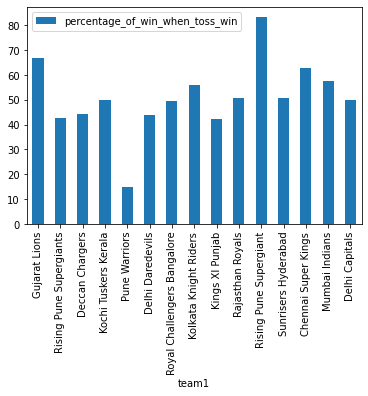

In [ ]:
pdf_1=probability_win2.toPandas()
pdf_1.plot(x="team1", y=["percentage_of_win_when_toss_win"], kind="bar")

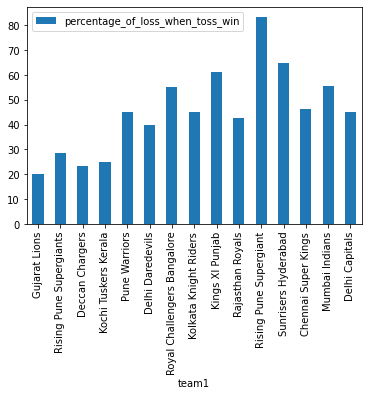

In [ ]:
pdf_1.plot(x="team1", y=["percentage_of_loss_when_toss_win"], kind="bar")

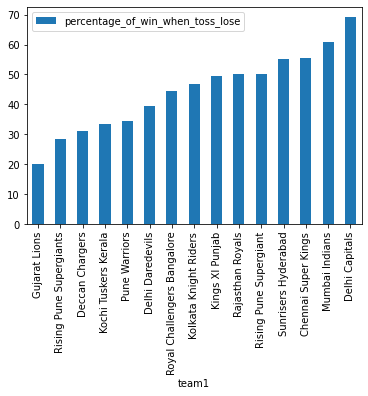

In [ ]:
pdf_2=probability_win2.toPandas()
pdf_2.plot(x="team1", y=["percentage_of_win_when_toss_lose"], kind="bar")

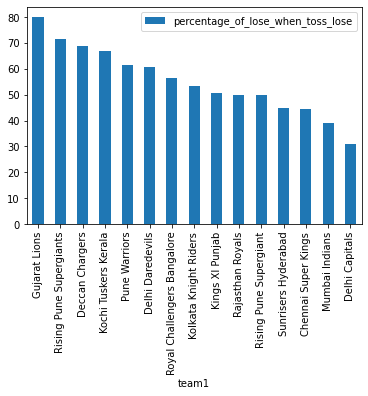

In [ ]:
pdf_2.plot(x="team1", y=["percentage_of_lose_when_toss_lose"], kind="bar")

In [ ]:
ipl_matches.select("winner").distinct().collect()

[Row(winner='Sunrisers Hyderabad'),
 Row(winner='Chennai Super Kings'),
 Row(winner='NA'),
 Row(winner='Rising Pune Supergiant'),
 Row(winner='Deccan Chargers'),
 Row(winner='Kochi Tuskers Kerala'),
 Row(winner='Rajasthan Royals'),
 Row(winner='Gujarat Lions'),
 Row(winner='Royal Challengers Bangalore'),
 Row(winner='Kolkata Knight Riders'),
 Row(winner='Rising Pune Supergiants'),
 Row(winner='Kings XI Punjab'),
 Row(winner='Pune Warriors'),
 Row(winner='Delhi Daredevils'),
 Row(winner='Delhi Capitals'),
 Row(winner='Mumbai Indians')]

In [ ]:
noresult_match=ipl_matches.filter(ipl_matches.winner=="NA")
noresult_match.count()

4

#Section 3: Expose Data

In [ ]:
##Example Colab

from pyspark.sql import SparkSession

class Database:
  #Constructor 
  #   Takes value from either a url if url provided or takes the data from the csv file
  def __init__(self, appName = 'TEST', matchesURL = "", venueURL = "", BallbyBallURL = ""):
    ##Creating a spark session whose name is given as appName
    self.spark = (SparkSession
    .builder
    .appName(appName)
    .getOrCreate())
    try:
       #Loading the matches dataset
      if matchesURL == "":
        self.ipl_matches = self.spark.read.load("ipl_matches.csv",format="csv", sep=",", inferSchema="true", header="true")
      
      if venueURL == "":
        self.ipl_venue = self.spark.read.load("ipl_venue.csv",format="csv", sep=",", inferSchema="true", header="true")
      if BallbyBallURL == "":
        self.ipl_ball_by_ball = self.spark.read.load("ipl_ball_by_ball.csv",format="csv", sep=",", inferSchema="true", header="true")

      
    
    #self.df_ball_by_ball = self.spark.read.load("ipl_ball_by_ball.csv", format="csv", sep=",", inferSchema="true", header="true"
    
      self.ipl_venue = self.spark.read.load("ipl_venue.csv",format="csv", sep=",", inferSchema="true", header="true")
      self.ipl_matches = self.spark.read.load("ipl_matches.csv",format="csv", sep=",", inferSchema="true", header="true")
      self.ipl_ball_by_ball = self.spark.read.load("ipl_ball_by_ball.csv",format="csv", sep=",", inferSchema="true", header="true")
      self.ipl_matches.createOrReplaceTempView("ipl_matches") 
      self.ipl_venue.createOrReplaceTempView("ipl_venues") 
      self.ipl_ball_by_ball.createOrReplaceTempView("ipl_ball_by_ball")
    except:
      print("Dataset not found")

  def get_query1_result(self):
    try:
      self.eliminator=self.ipl_matches.filter(self.ipl_matches.eliminator == "Y").groupBy('venue_id').count().sort('count',ascending=False).limit(3)
      self.top3=self.ipl_venue.join(self.eliminator,self.ipl_venue.venue_id== self.eliminator.venue_id,"inner").sort('count',ascending=False).select("venue").toPandas()
      return {"Q1" : list(self.top3.venue.values)[:3]}
    except:
      print("Something wrong in your code")
  def get_query2_result(self):
    try:
      self.caught=self.ipl_ball_by_ball.filter(self.ipl_ball_by_ball.dismissal_kind=='caught').groupBy('fielder').count().sort('count',ascending=False).limit(1)
      self.caught=self.caught.toPandas().to_json
      return self.caught
    except:
      print("Something wrong in your code")

  def get_query3_result(self):
    try:
      self.method=self.ipl_matches.filter(self.ipl_matches.method=='D/L')
      self.highest_wicket_taker=self.ipl_ball_by_ball.join(self.method,self.ipl_ball_by_ball.match_id== self.method.match_id,"inner")\
      .filter((self.ipl_ball_by_ball.dismissal_kind!="NA")&(self.ipl_ball_by_ball.dismissal_kind!="retired hurt"))\
      .groupBy("bowler").count().sort('count',ascending=False).limit(1)
      self.highest_wicket_taker=self.highest_wicket_taker.toPandas().to_json
      return self.highest_wicket_taker
    except:
      print("Something wrong in your code")
  def get_query4_result(self):
    try:
      self.e=self.ipl_ball_by_ball.filter(self.ipl_ball_by_ball["overs"]>=7)\
      .filter((self.ipl_ball_by_ball.extras_type!='noballs') & (self.ipl_ball_by_ball.extras_type!='wides'))
      self.ball_face=self.e.groupBy("batsman").count()
      self.ball_face=self.ball_face.withColumnRenamed("count","No_of_ball_faced")
      self.l=self.e.groupBy('batsman').sum()
      self.addcolumn=self.l.join(self.ball_face,self.l.batsman==self.ball_face.batsman,"inner").drop(self.ball_face.batsman).filter(self.ball_face["No_of_ball_faced"]>1000)\
      .sort("sum(batsman_runs)",ascending=False)
      self.strike_rate =self.addcolumn.withColumn('Strike_rate', \
                                        100*((self.addcolumn['sum(batsman_runs)'])/(self.addcolumn['No_of_ball_faced'])))\
                                        .sort("Strike_rate",ascending=False).limit(1).select("batsman","Strike_rate").toPandas().to_json
      return self.strike_rate
    except:
      print("Something wrong in your code")
  def get_query5_result(self):
    try:
      self.k=self.ipl_ball_by_ball.groupBy('match_id').sum().select("match_id","sum(extra_runs)").sort("sum(extra_runs)",ascending=False).limit(1)
      self.id=self.k.first()['match_id']
      self.v=self.ipl_matches.filter(self.ipl_matches.match_id==self.id)
      self.id1=self.v.first()['venue_id']
      self.highestextraruns=self.ipl_venue.where(self.ipl_venue.venue_id==self.id1).toPandas().to_json
      return self.highestextraruns
    except:
      print("Something wrong in your code")
  def get_query6_result(self):
    try:
      self.neutral=self.ipl_matches.filter(self.ipl_matches.neutral_venue==1).groupBy("player_of_match").count().sort("count",ascending=False).limit(5).toPandas().to_json
      return self.neutral
    except:
      print("Something wrong in your code")
  def get_query7_result(self):
    try:
      self.no_of=self.ipl_ball_by_ball.filter(self.ipl_ball_by_ball["player_dismissed"]!="NA").groupBy('batsman').count()
      self.batsman_runs=self.ipl_ball_by_ball.groupBy("batsman").sum()
      self.batsman_runs=self.batsman_runs.join(self.no_of,self.batsman_runs.batsman==self.no_of.batsman,"inner").drop(self.no_of.batsman)\
      .filter(self.batsman_runs["sum(batsman_runs)"]>2000).sort("sum(batsman_runs)",ascending=False)
      self.bat_avg =self.batsman_runs.withColumn('bat_avg',((self.batsman_runs['sum(batsman_runs)'])/(self.batsman_runs['count']))).sort('bat_avg',ascending=False)
      self.top10=self.bat_avg.select("batsman","bat_avg").limit(10).toPandas().to_json
      return self.top10
    except:
      print("Something wrong in your code")
  def get_query8_result(self):
    try:
      self.umpire1=self.ipl_matches.groupBy("umpire1").count().sort("umpire1",ascending=False)
      self.umpire2=self.ipl_matches.groupBy("umpire2").count().sort("umpire2",ascending=False)
      self.umpire1=self.umpire1.withColumnRenamed("count","count1")
      self.ta = self.umpire1.alias('umpire1')
      self.tb = self.umpire2.alias('umpire2')
      self.full_outer_join = self.ta.join(self.tb, self.ta.umpire1 == self.tb.umpire2,how='inner').drop(self.tb.umpire2)
      self.umpirecount=self.full_outer_join.withColumn("umpire_count",\
                                                       (self.full_outer_join["count"]+self.full_outer_join["count1"]))\
                                                       .sort("umpire_count",ascending=False).select("umpire1","umpire_count")\
                                                       .limit(1).toPandas().to_json
      return self.umpirecount
    except:
      print("Something wrong in your code")
  def get_query9_result(self):
    try:
      self.virat=self.ipl_ball_by_ball.filter(self.ipl_ball_by_ball.batsman=="V Kohli").groupBy("match_id").sum()\
      .sort("sum(batsman_runs)",ascending=False)
      self.matid=self.virat.collect()[0]["match_id"]
      self.Vkohli_match=self.ipl_matches.filter(self.ipl_matches["match_id"]==matid)
      self.venid=self.Vkohli_match.collect()[0]["venue_id"]
      self.Vkohli=self.ipl_venue.filter(self.ipl_venue["venue_id"]==self.venid).toPandas().to_json
      return self.Vkohli
    except:
      print("Something wrong in your code")
  def get_query10_result(self):
    try:
      from pyspark.sql.functions import when
      self.toss_lose=self.ipl_matches.withColumn("toss_loser",when(self.ipl_matches.team1!= self.ipl_matches.toss_winner,self.ipl_matches.team1).when(self.ipl_matches.team2!= self.ipl_matches.toss_winner,self.ipl_matches.team2))
      self.loser=self.toss_lose.withColumn("loser",when(self.toss_lose.team1!= self.toss_lose.winner,self.toss_lose.team1).when(self.toss_lose.team2!= self.toss_lose.winner,self.toss_lose.team2))
      self.toss_loser=self.loser.groupBy("toss_loser").count()
      self.toss_loser=self.toss_loser.withColumnRenamed("count","toss_loser_count")
      self.toss_winner=self.loser.groupBy("toss_winner").count()
      self.toss_winner=self.toss_winner.withColumnRenamed("count","toss_winner_count")
      self.tosswinnercount=self.toss_winner.join(self.toss_loser,self.toss_winner.toss_winner == self.toss_loser.toss_loser,"inner").drop(self.toss_loser.toss_loser)
      self.toss_loss_match_win=self.loser.filter(self.loser.toss_loser==self.loser.winner)
      self.toss_loss_match_lose=self.loser.filter(self.loser.toss_loser!=self.loser.winner)
      self.toss_win_match_win=self.ipl_matches.filter(self.ipl_matches.toss_winner==self.ipl_matches.winner)
      self.toss_win_match_loss=self.ipl_matches.filter(self.ipl_matches.toss_winner!=self.ipl_matches.winner)
      self.team1=self.ipl_matches.groupBy("team1").count()
      self.team2=self.ipl_matches.groupBy("team2").count()
      self.team1=self.team1.withColumnRenamed("count","count1")
      self.ts = self.team1.alias('team1')
      self.tc = self.team2.alias('team2')
      self.full_outer_join_1 = self.ts.join(self.tc, self.ts.team1 == self.tc.team2,how='full') # Could also use 'full_outer'
      self.tocount=self.full_outer_join_1.withColumn("total_match_count",(self.full_outer_join_1["count1"])+(self.full_outer_join_1["count1"])).sort("team1",ascending=True)
      self.tocount=self.tocount.select(self.tocount["team1"],self.tocount["total_match_count"])
      self.toss_lose_match_win_count=self.toss_loss_match_win.groupBy("winner").count().sort("winner",ascending=True)
      self.toss_lose_match_win_count=self.toss_lose_match_win_count.withColumnRenamed("count","toss_lose_match_win_count")
      self.toss_lose_match_lose_count=self.toss_loss_match_lose.groupBy("loser").count().sort("loser",ascending=True)
      self.toss_lose_match_lose_count=self.toss_lose_match_lose_count.withColumnRenamed("count","toss_lose_match_lose_count")
      self.toss_win_match_win_count=self.toss_win_match_win.groupBy("winner").count().sort("winner",ascending=True)
      self.toss_win_match_win_count=self.toss_win_match_win_count.withColumnRenamed("count","toss_win_match_win_count")
      self.toss_win_match_loss_count=self.toss_win_match_loss.groupBy("winner").count().sort("winner",ascending=True)
      self.toss_win_match_loss_count=self.toss_win_match_loss_count.withColumnRenamed("count","toss_win_match_loss_count")
      self.to = self.tocount.alias('tocount')
      self.ti = self.toss_lose_match_win_count.alias('toss_lose_match_win_count')
      self.full_outer_join_8 = self.to.join(self.ti, self.to.team1 == self.ti.winner,how='full') 
      self.tu = self.tocount.alias('tocount')
      self.ty = self.toss_lose_match_lose_count.alias('toss_lose_match_lose_count')
      self.full_outer_join_9 = self.tu.join(self.ty, self.tu.team1 == self.ty.loser,how='full')
      self.tl = self.tocount.alias('tocount')
      self.tp = self.toss_win_match_win_count.alias('toss_win_match_win_count')
      self.full_outer_join_2 = self.tl.join(self.tp, self.tl.team1 == self.tp.winner,how='full')
      self.t1 =self.full_outer_join_2.alias('full_outer_join_2')
      self.t2 = self.toss_win_match_loss_count.alias('toss_win_match_loss_count')
      self.full_outer_join_3 = self.t1.join(self.t2, self.t1.team1 == self.t2.winner,how='full')
      self.t1 =self.full_outer_join_3.alias('full_outer_join_3')
      self.t2 = self.toss_lose_match_win_count.alias('toss_lose_match_win_count')
      self.full_outer_join_11 = self.t1.join(self.t2, self.t1.team1 == self.t2.winner,how='full')
      self.t1 =self.full_outer_join_11.alias('full_outer_join_11')
      self.t2 = self.toss_lose_match_lose_count.alias('toss_lose_match_lose_count')
      self.full_outer_join_12 = self.t1.join(self.t2, self.t1.team1 == self.t2.loser,how='full')
      self.full_outer_join_12=self.full_outer_join_12.join(self.tosswinnercount,self.full_outer_join_12.team1==self.tosswinnercount.toss_winner,"inner").drop(self.tosswinnercount.toss_winner)
      self.probability_win=self.full_outer_join_12.withColumn("percentage_of_win_when_toss_win",100*(self.full_outer_join_12["toss_win_match_win_count"])/(self.full_outer_join_12["toss_winner_count"])).sort("percentage_of_win_when_toss_win",ascending=False)
      self.probability_loss=self.probability_win.withColumn("percentage_of_loss_when_toss_win",100*(self.probability_win["toss_win_match_loss_count"])/(self.probability_win["toss_winner_count"])).sort("percentage_of_loss_when_toss_win",ascending=False) 
      self.result=self.probability_loss.select("team1","total_match_count","toss_win_match_win_count","toss_win_match_loss_count","toss_lose_match_win_count","toss_lose_match_lose_count","toss_winner_count","toss_loser_count","percentage_of_win_when_toss_win","percentage_of_loss_when_toss_win")
      self.result=self.result.na.drop()
      self.probability_win1=self.result.withColumn("percentage_of_win_when_toss_lose",100*(self.result["toss_lose_match_win_count"])/(self.result["toss_loser_count"])).sort("percentage_of_win_when_toss_lose",ascending=False)
      self.probability_win2=self.probability_win1.withColumn("percentage_of_lose_when_toss_lose",100*(self.probability_win1["toss_lose_match_lose_count"])/(self.probability_win1["toss_loser_count"])).sort("percentage_of_lose_when_toss_lose",ascending=False)
      self.pdf_1=self.probability_win2.toPandas()
      self.pdf_1.plot(x="team1", y=["percentage_of_win_when_toss_win"], kind="bar")
      self.pdf_1.plot(x="team1", y=["percentage_of_loss_when_toss_win"], kind="bar")
      self.pdf_1.plot(x="team1", y=["percentage_of_win_when_toss_lose"], kind="bar")
      self.pdf_1.plot(x="team1", y=["percentage_of_lose_when_toss_lose"], kind="bar")
    except:
      print("Something wrong in your code")

  

In [ ]:
db = Database()
db.get_query1_result()

{'Q1': ['Dubai International Cricket Stadium',
  'Sheikh Zayed Stadium',
  'Feroz Shah Kotla']}

In [ ]:
db.get_query2_result()

<bound method NDFrame.to_json of       fielder  count
0  KD Karthik    118>

In [ ]:
db.get_query3_result()

<bound method NDFrame.to_json of      bowler  count
0  R Ashwin      8>

In [ ]:
db.get_query4_result()

<bound method NDFrame.to_json of     batsman  Strike_rate
0  CH Gayle   172.805643>

In [ ]:
db.get_query5_result()

<bound method NDFrame.to_json of    venue_id         venue     city
0        15  Eden Gardens  Kolkata>

In [ ]:
db.get_query6_result()

<bound method NDFrame.to_json of   player_of_match  count
0       YK Pathan      3
1       JH Kallis      3
2       JP Duminy      3
3      GJ Maxwell      3
4   KC Sangakkara      2>

In [ ]:
db.get_query7_result()

<bound method NDFrame.to_json of           batsman    bat_avg
0        KL Rahul  42.693548
1  AB de Villiers  42.535088
2       DA Warner  41.698413
3       JP Duminy  41.408163
4        CH Gayle  41.137931
5        SE Marsh  38.703125
6        MS Dhoni  36.761905
7         V Kohli  36.061350
8         RR Pant  35.237288
9    F du Plessis  34.358209>

In [ ]:
db.get_query8_result()

<bound method NDFrame.to_json of   umpire1  umpire_count
0  S Ravi           121>

In [ ]:
db.get_query9_result()

<bound method NDFrame.to_json of    venue_id                  venue       city
0        35  M.Chinnaswamy Stadium  Bengaluru>

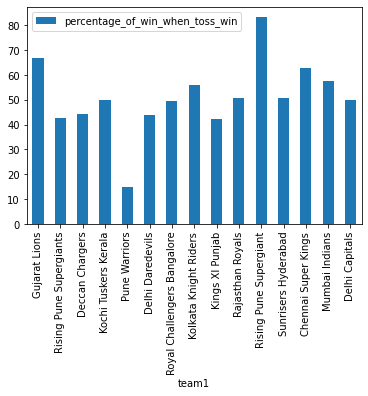

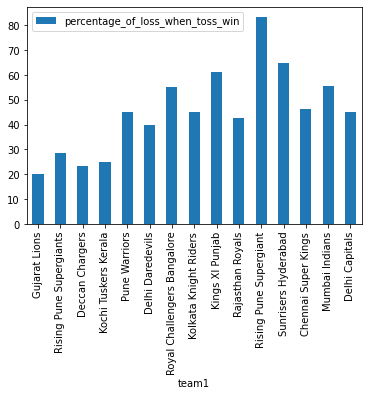

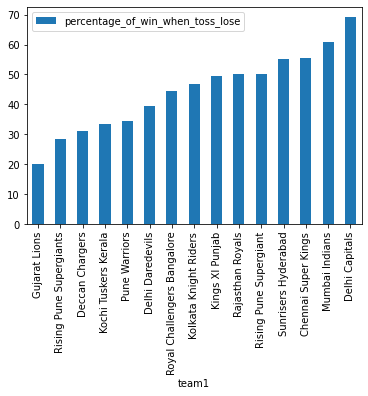

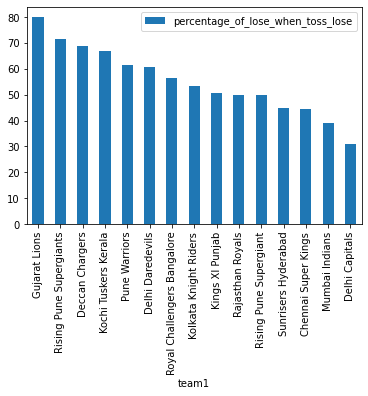

In [ ]:
db.get_query10_result()